# HMM to estimate Funnel position

## Import libraries and constants

In [1]:
# Constants
import config.CONSTANTS_HMM
from config.CONSTANTS_HMM import *
from config.execution_parameters import *

# Project libraries
import src.hmm_package.generate_hmm
from src.hmm_package.generate_hmm import *
from src.plot_and_print_info.plots_and_print_info import *

# Built in libraries
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
import importlib

In [2]:
importlib.reload(src.hmm_package.generate_hmm)
from src.hmm_package.generate_hmm import *
importlib.reload(config.CONSTANTS_HMM)
from config.CONSTANTS_HMM import *

## Compute Observation and Adstock

In [3]:
# Generate Test observation
observation = simulate_observations()

# Compute Adstock
adstock = compute_adstock(observation=observation)

2022-02-16 16:15:45.594071: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Real HMM to Estimate

In [4]:
# Generate the distributions to build the Real HMM
#NB The variable STATES_ARE_OBSERVABLE is set in config/execution_parameters.
hmm_distributions = generate_hmm_distributions(states_observable=True, adstock=adstock)

# Create Real HMM to fit
real_hmm = tfd.HiddenMarkovModel(
    initial_distribution=hmm_distributions['initial_distribution'],
    transition_distribution=hmm_distributions['transition_distribution'],
    observation_distribution=hmm_distributions['observation_distribution'],
    time_varying_transition_distribution=True,
    num_steps=time+1
)

# Sample emissions
emission_real = real_hmm.sample(1).numpy()[0]

### Visualize the Real HMM

5040


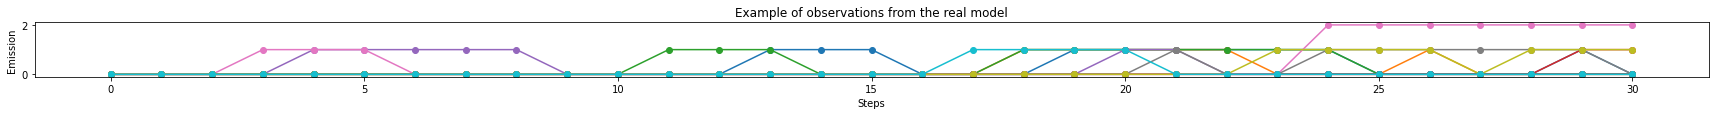

In [5]:
# Count conversions from sampled data
tot_conversions = count_conversions(emission_real, STATES_ARE_OBSERVABLE)

plot_sample_emissions(real_hmm)

## Build model to fit

In [6]:
# STATES_ARE_OBSERVABLE is defined in CONSTANTS_HMM
model = build_hmm_to_fit( states_observable=STATES_ARE_OBSERVABLE )

compiler = CompilerInfo(LR_EXPONENTIAL_DECAY)
model.compile(
    loss = compiler.loss,
    optimizer = compiler.optimizer,
    run_eagerly = True
)

2022-02-16 16:50:53.226372: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


## Fit the model

In [7]:
#model_fitted = model.fit(adstock,
#                         emission_real,
#                         epochs=EPOCHS,
#                         batch_size=BATCH_SIZE,
#                         verbose=True)


#cerca di capire cosa fitta il modello.
#modifica la loss

Epoch 1/100
 3/40 [=>............................] - ETA: 1:29 - loss: 8225.0752

KeyboardInterrupt: 